In [1]:
import scipy.stats as sp
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
from PIL import ImageFont, ImageDraw, Image

In [23]:
aa = cv2.imread('qwe.jpg',0)
# plt.imshow(aa)

def binlut():
    return np.array([0 if x < (255/2) else 255 
                     for x in range(256)]).astype('uint8')

# bin1 = cv2.LUT(aa, binlut())
# plt.imshow(bin1, cmap='gray')

adaptive = cv2.adaptiveThreshold(aa, 255,
                                    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                    cv2.THRESH_BINARY, 31, 20)

# plt.show()
adaptive = cv2.resize(adaptive,(0,0),fx=0.5,fy=0.5 )
cv2.imwrite('res.jpg', adaptive)

True

<img src='normal.png' width=500>

In [2]:
sp.norm(78,12).pdf(90) #평균 78, sigma 12일때, 90일 확률?

0.020164227043261946

(180, 187, 3)
9
255
19


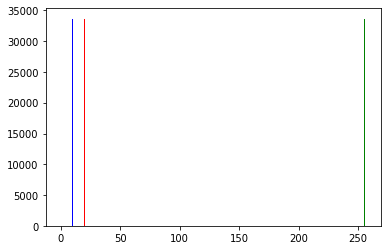

In [3]:
train = cv2.imread("patch3.png")    
print(train.shape)
b,g,r = cv2.split(train)
hb = plt.hist(b.ravel(), 256, [0,256], color='b') 
hg = plt.hist(g.ravel(), 256, [0,256], color='g') 
hr = plt.hist(r.ravel(), 256, [0,256], color='r') 
maxb = (np.where( hb[0] == np.max(hb[0])) )[0][0]
maxg = (np.where( hg[0] == np.max(hg[0])) )[0][0]
maxr = (np.where( hr[0] == np.max(hr[0])) )[0][0]
print(maxb)
print(maxg)
print(maxr)

# 평균을 이용해 코드 바꿔보기. hsv, rgb 둘다.
# print(np.mean(b))
# print(np.mean(g))
# print(np.mean(r))

# t=7
# p=sp.norm(0,1).pdf((9-7)/4)
# print(p)

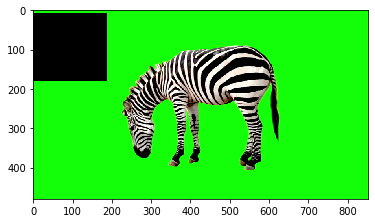

In [4]:
test = cv2.imread("zebra.jpg")
for r in range(train.shape[0]) :
    for c in range(train.shape[1]) :        
        if  np.array_equal (test[r,c,:], [maxb, maxg, maxr]) :
            test[r, c, : ] = [0,0,0]               

plt.imshow(cv2.cvtColor(test, cv2.COLOR_BGR2RGB) )   

---
<img src='../수업 PPT/ch04_화소 점 처리/슬라이드17.jpg' width=500>
<img src='../수업 PPT/ch04_화소 점 처리/슬라이드18.jpg' width=500>

In [5]:
# uint8과 int의 차이 구분하기. [260  30 264], [255  30 255]
a = np.array([250, 20, 254],dtype='uint8')
b = a + 10
print(b)

a = np.array([250, 20, 254],dtype='int')
b = a + 10
print(b)

c = np.clip(b, 0, 255) #np의 클립 함수로 clamping 기법 사용 가능. (데이터, 최소값, 최대값)
print(c)

# 리스트는 복합 형태를 모두 포함할 수 있지만, numpy의 array는 float의 형태로 모두 변환함.
# ->데이터끼리의 고속 연산 가능
e=[0, 1.0]
f=np.array(e)

print(type(e[0]))
print(type(e[1]))
print(type(f[0]))
print(type(f[0]))

[ 4 30  8]
[260  30 264]
[255  30 255]
<class 'int'>
<class 'float'>
<class 'numpy.float64'>
<class 'numpy.float64'>


(512, 512)
<class 'numpy.ndarray'>
<class 'numpy.uint8'>
<class 'numpy.ndarray'>
<class 'numpy.int32'>


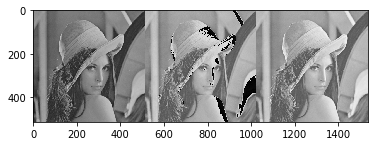

In [6]:
img=cv2.imread('lena.png', cv2.IMREAD_GRAYSCALE)  #자동으로 gray사진으로 바꿔줌. 3차원->2차원
print(img.shape)
print(type(img))
print(type(img[0,0]))

img2 = img + 50    #uint8 -> overflow 발생. 

imgint = np.array(img, dtype='int') #overflow 안되도록 범위 확장(int32 형)
imgint2 = imgint + 50
print(type(imgint))
print(type(imgint[0,0]))

plt.imshow(np.hstack([img, img2, imgint2]), cmap='gray')
# plt.imshow(img2)

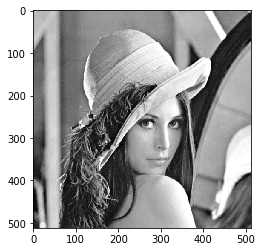

In [7]:
# 클램핑 적용
img2 = img.astype(np.float32)
img2 *= 1.2
img2 = np.clip(img2, 0, 255)
img2 = img2.astype(np.uint8)

plt.imshow(img2, cmap='gray')

In [8]:
# LUT 예시
lut1= [x+5 for x in range(10)]
lut2 = [x+5 if x+5<=9 else 9 for x in range(10)]

print(lut1)
print(lut2)

def addlut(op):
    return[x + op if x + op <255 else 255 for x in range(256)]

print(addlut(5))

def mullut(op):
    return[x * op if x * op <255 else 255 for x in range(256)]

print(mullut(1.5))

[5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
[5, 6, 7, 8, 9, 9, 9, 9, 9, 9]
[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 21

<img src='../수업 PPT/ch04_화소 점 처리/슬라이드32.jpg' width=500>

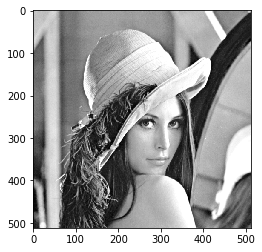

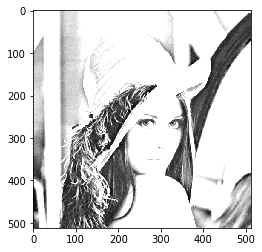

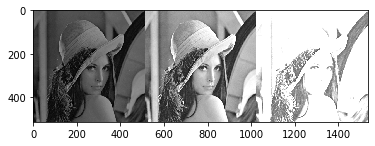

In [9]:
# 명암 대비 변환 LUT
def addlut(op):
    return np.array([x + op if x + op <255 else 255 
                     for x in range(256)]).astype('uint8')

def mullut(op):
    return np.array([x * op if x * op <255 else 255 
                     for x in range(256)]).astype('uint8')

src2 = cv2.LUT(img, addlut(50))
# print(src2)
plt.imshow(src2, cmap='gray')
plt.show()

src2 = cv2.LUT(img, mullut(2))
# print(src2)
plt.imshow(src2, cmap='gray')
plt.show()

all = np.hstack([
    cv2.LUT(img, mullut(0.7)),
    cv2.LUT(img, mullut(1.2)),
    cv2.LUT(img, mullut(2.5))])

plt.imshow(all, cmap='gray')
plt.show()

<img src='../수업 PPT/ch04_화소 점 처리/슬라이드35.jpg' width=500>

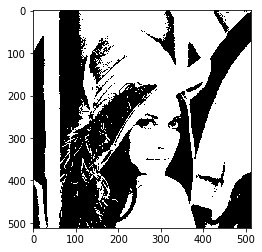

In [10]:
# 이진화 LUT
def binlut():
    return np.array([0 if x < (255/2) else 255 
                     for x in range(256)]).astype('uint8')

bin1 = cv2.LUT(img, binlut())
plt.imshow(bin1, cmap='gray')
plt.show()

<img src='../수업 PPT/ch04_화소 점 처리/슬라이드36.jpg' width=500>

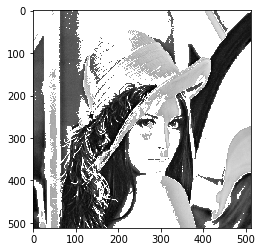

In [11]:
# 범위 강조 LUT
def intenselut(w, b):
    return np.array([255 if w-b < x < w+b else x 
                     for x in range(256)]).astype('uint8')

intenselut = cv2.LUT(img, intenselut(150, 30))
plt.imshow(intenselut, cmap='gray')
plt.show()

<img src='../수업 PPT/ch04_화소 점 처리/슬라이드34.jpg' width=500>

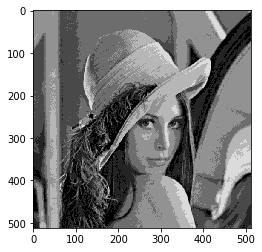

In [12]:
# 포스터라이징 LUT
def posterlut(l):
    return np.array([ int(x/l)*l for x in range(256)]).astype('uint8')

posterlut = cv2.LUT(img, posterlut(30))
plt.imshow(posterlut, cmap='gray')
plt.show()

<img src='../수업 PPT/ch04_화소 점 처리/슬라이드29.jpg' width=500>

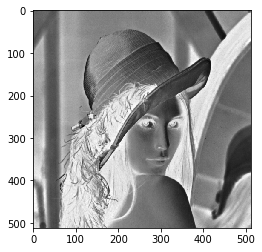

In [13]:
# 반전 변환 LUT
def inverselut():
    return np.array([ 255-x for x in range(256)]).astype('uint8')

inverselut = cv2.LUT(img, inverselut())
plt.imshow(inverselut, cmap='gray')
plt.show()

<img src='../수업 PPT/ch04_화소 점 처리/슬라이드30.jpg' width=500>

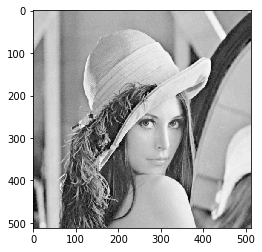

In [14]:
# 감마 보정 LUT
def gammalut(gamma):
    invGamma = 1.0/ gamma
    return np.array([ ((x/255.0) ** invGamma)*255 for x in range(256)]).astype('uint8')

gamma_lut = cv2.LUT(img, gammalut(10))
plt.imshow(gamma_lut, cmap='gray')
plt.show()

(512, 512)
(512, 512, 3)


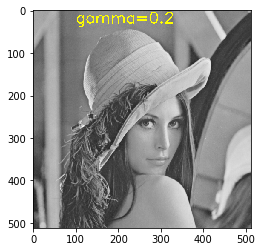

In [15]:
# 사진에 text 추가 예제
img = cv2.imread('lena.png', cv2.IMREAD_GRAYSCALE)
print(img.shape)
col = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
print(col.shape)

cv2.putText(col, 'gamma=0.2', (100, 30), cv2.FONT_HERSHEY_SIMPLEX, 1.2, (255, 255, 0), 2)
plt.imshow(col)

In [16]:
img_gamma = cv2.imread('gamma.jpg')
print(img_gamma.shape)

col3 = cv2.LUT(img_gamma, gammalut(0.5))
cv2.putText(col, 'gamma=0.5', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1.2, (255, 255, 0), 2)
cv2.imwrite('g1.jpg', col3)

col3 = cv2.LUT(img_gamma, gammalut(1.5))
cv2.putText(col, 'gamma=1.5', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1.2, (255, 255, 0), 2)
cv2.imwrite('g2.jpg', col3)

col3 = cv2.LUT(img_gamma, gammalut(2.5))
cv2.putText(col, 'gamma=2.5', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1.2, (255, 255, 0), 2)
cv2.imwrite('g3.jpg', col3)

col3 = cv2.LUT(img_gamma, gammalut(3.5))
cv2.putText(col, 'gamma=3.5', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1.2, (255, 255, 0), 2)
cv2.imwrite('g4.jpg', col3)


(405, 720, 3)


True

In [17]:
im1 = Image.open('g1.jpg')
im2 = Image.open('g2.jpg')
im3 = Image.open('g3.jpg')
im4 = Image.open('g4.jpg')

im1.save('output3.gif', save_all=True, append_images=[im2, im3, im4],duration=500,loop=0)

<img src='output3.gif' width=800>

In [18]:
img = cv2.imread('gamma.jpg')
imgPIL = Image.fromarray(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

font = ImageFont.truetype('malgun.ttf', 20)

draw = ImageDraw.Draw(imgPIL)
draw.text((10,10), '안녕', font=font, fill=(255,0,0))
imgPIL.save('fontout.jpg')

In [19]:
img = cv2.imread('lena.png')

k=3
kernel = np.ones((k, k), np.float32)/(k * k)
print(kernel)

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


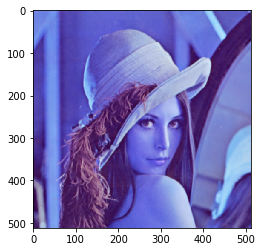

In [20]:
filtered = cv2.filter2D(img, -1, kernel)
plt.imshow(filtered)

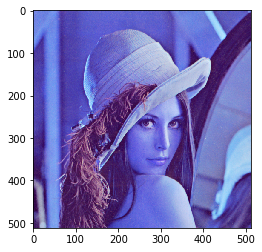

In [21]:
kernel = np.array([[0,0,0],
                  [0,1,0],
                  [0,0,0]])
filtered = cv2.filter2D(img,-1, kernel)
plt.imshow(filtered)